In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/spambase_csv.csv")

In [ ]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-1945366066.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
label_encoder = LabelEncoder()
binary_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

multi_cols = [col for col in df.select_dtypes(include='object') if col not in binary_cols]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [ ]:
target_col = 'class'  # CHANGE THIS
X = df.drop(target_col, axis=1)
y = df[target_col]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
def evaluate_classifier(model, X_data, y_true, name="Set"):
    y_pred = model.predict(X_data)
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_classifier(model, X_val, y_val, "Validation")
evaluate_classifier(model, X_test, y_test, "Test")

--- Validation ---
Accuracy : 0.9115942028985508
Precision: 0.9125485543639725
Recall   : 0.9115942028985508
F1 Score : 0.9110138062300029

Confusion Matrix:
 [[380  19]
 [ 42 249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       399
           1       0.93      0.86      0.89       291

    accuracy                           0.91       690
   macro avg       0.91      0.90      0.91       690
weighted avg       0.91      0.91      0.91       690

--- Test ---
Accuracy : 0.934876989869754
Precision: 0.934964377156852
Recall   : 0.934876989869754
F1 Score : 0.9346747976288967

Confusion Matrix:
 [[388  17]
 [ 28 258]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       405
           1       0.94      0.90      0.92       286

    accuracy                           0.93       691
   macro avg       0.94      0.93      0.93       

In [ ]:
# Apply 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.917481   0.92282609 0.88804348 0.94021739 0.83152174]
Mean accuracy: 0.9000179389132794


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

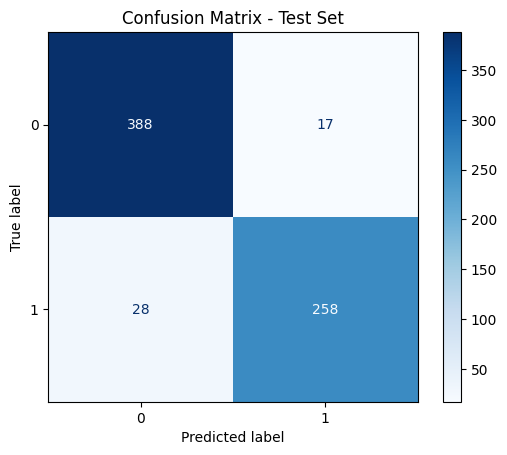

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

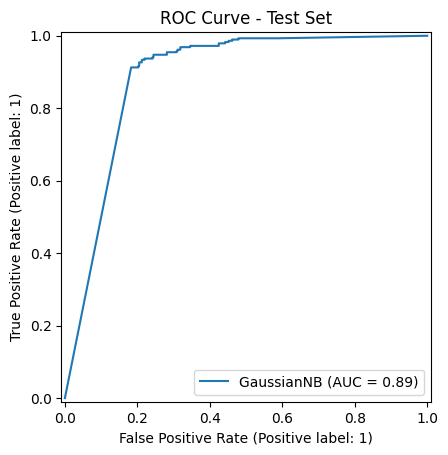

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Test Set")
plt.show()